In [2]:
# import module
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from  sklearn import datasets #import boston house dataset provding from sklean
from sklearn.svm import SVR
%matplotlib inline

In [3]:
# load dataset
datas = datasets.load_boston()

"""feature name describe"""
# CRIM      per capita crime rate by town
# ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS     proportion of non-retail business acres per town
# CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
# NOX       nitric oxides concentration (parts per 10 million)
# RM        average number of rooms per dwelling
# AGE       proportion of owner-occupied units built prior to 1940
# DIS       weighted distances to five Boston employment centres
# RAD       index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                  by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

'feature name describe'

In [4]:
# convert boston dataset to dataframe
df = pd.DataFrame(datas.data, columns=datas.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
# showing the dimensionality of the DataFrame
# we can find 506 record and 13 colume which is feature name
df.shape

(506, 13)

In [8]:
# houses informations(idependent variable)
X = df
# y is the medium housing price(dependent variable)
y = datas['target']

In [9]:
# max、min、mean and std y(house price)
min_y = np.min(y)
max_y = np.max(y)
mean_y = np.mean(y)
std_y = np.std(y)

print('Statistics for Boston housing dataset:\n')
print("Min-y : {:,.2f}".format(min_y))
print("Max-y : {:,.2f}".format(max_y))
print("Mean-y : {:,.2f}".format(mean_y))
print("Std-y : {:,.2f}".format(std_y))

Statistics for Boston housing dataset:

Min-y : 5.00
Max-y : 50.00
Mean-y : 22.53
Std-y : 9.19


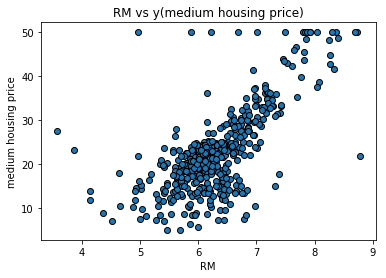

In [10]:
# RM vs y(medium housing price)
plt.scatter(X['RM'], y, edgecolors=(0, 0, 0))
plt.title('RM vs y(medium housing price)')
plt.xlabel('RM')
plt.ylabel('medium housing price')

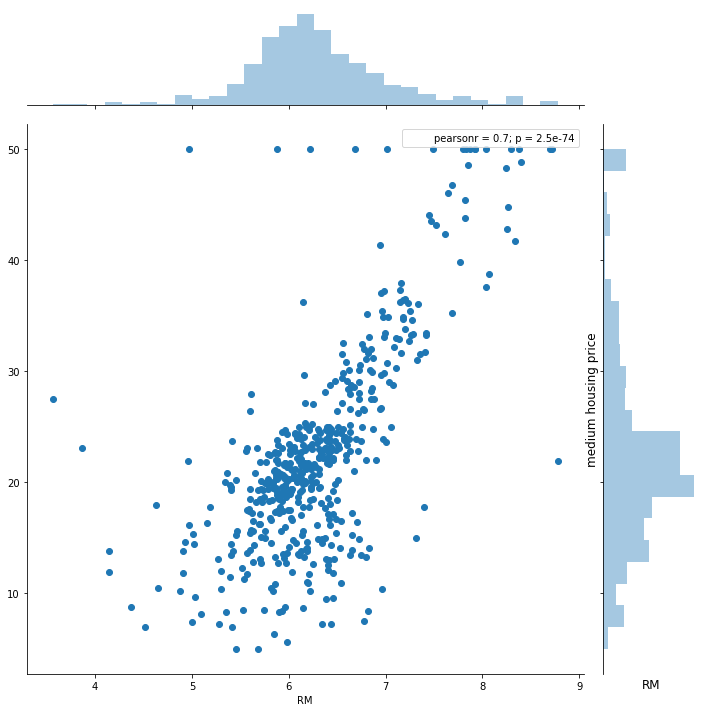

<function seaborn.utils.despine>

In [11]:
plt.figure(figsize=(10,10))
sns.jointplot(x=X.RM, y=y, size=10)
plt.xlabel('RM', fontsize = 12)
plt.ylabel('medium housing price', fontsize = 12)
plt.show()
sns.despine

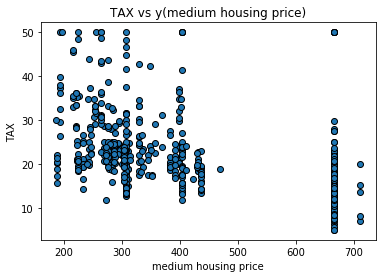

In [15]:
# TAX vs y(medium housing price)
plt.scatter(X['TAX'], y, edgecolors=(0,0,0))
plt.title('TAX vs y(medium housing price)')
plt.xlabel('medium housing price')
plt.ylabel('TAX')